In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)

In [2]:
neg,avs,avm,avf,ri,rd = np.zeros((11,11)),np.zeros((11,11)),np.zeros((11,11)),np.zeros((11,11)),np.zeros((11,11)),np.zeros((11,11))
for m in range(3, 11):
    for n in range(3, 11):
        dnm = np.load('data/k2_v/m' + str(m) + '_n' + str(n) + '.npy')
        diff = dnm[:,0] - dnm[:,1]
        neg[m,n] = np.sum(diff<0)
        avs[m,n] = np.mean(dnm[:,0])
        avf[m,n] = np.mean(dnm[:,1])
        ri[m,n] = (avs[m,n] - avf[m,n]) / avs[m,n]
        
np.sum(neg)

9.0

0.05859667456527413

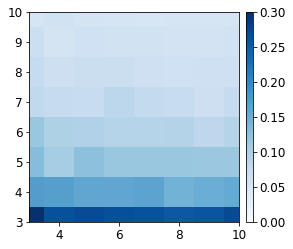

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
im = ax.imshow(ri, cmap='Blues', vmin=np.min(ri), vmax=np.max(ri), origin='lower');

ax.set_xlim(3, 10)
ax.set_ylim(3, 10)
div = make_axes_locatable(ax)
cax = div.append_axes("right", size="3%", pad=0.1)
plt.colorbar(im, cax=cax);
np.mean(ri)

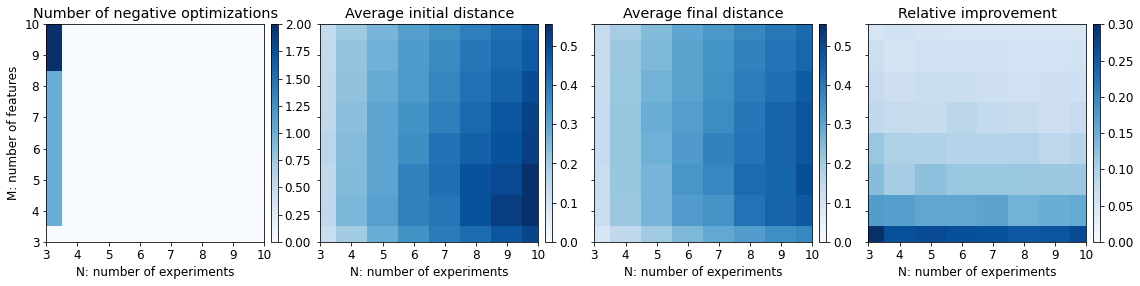

In [4]:
fig, ax = plt.subplots(1,4,figsize=(16,4),sharey=True)

im0 = ax[0].imshow(neg, cmap='Blues', vmin=0, vmax=np.max(neg), origin='lower')
ax[0].set_title('Number of negative optimizations')
im1 = ax[1].imshow(avs, cmap='Blues', vmin=0, vmax=np.max(avs), origin='lower')
ax[1].set_title('Average initial distance')
im2 = ax[2].imshow(avf, cmap='Blues', vmin=0, vmax=np.max(avs), origin='lower')
ax[2].set_title('Average final distance')
im3 = ax[3].imshow(ri, cmap='Blues', vmin=0, vmax=np.max(ri), origin='lower')
ax[3].set_title('Relative improvement')

ax[0].set_ylabel('M: number of features');
iml = [im0,im1,im2,im3]
for i in range(4):
    a = ax[i]
    a.set_xlim(3, 10)
    a.set_ylim(3, 10)
    a.set_xticks(np.arange(3,11))
    a.set_yticks(np.arange(3,11))
    a.set_xticklabels(np.arange(3,11))
    a.set_yticklabels(np.arange(3,11));
    a.set_xlabel('N: number of experiments')
    
    div = make_axes_locatable(a)
    cax = div.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(iml[i], cax=cax);
    
fig.tight_layout()

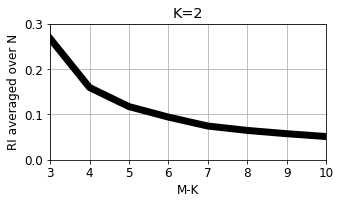

In [5]:
xtk = np.arange(3,11)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(xtk, np.mean(ri[3:,3:], axis=1), color = 'k', lw=7)
ax.set_ylim(0,0.3);
ax.set_xlim(3,10);
ax.set_ylabel('RI averaged over N');
ax.set_xlabel('M-K');
ax.set_title('K=2')
ax.set_xticks(xtk)
ax.grid(True)
fig.tight_layout()

In [6]:
fig.savefig('figures/k2-average.pdf')

In [7]:
np.mean(ri[3:,3:], axis=1)

array([0.26745603, 0.15935976, 0.11731592, 0.09414047, 0.07442484,
       0.06476734, 0.05751763, 0.05129271])

In [8]:
np.save('data/ri/ri2.npy', ri[3:,3:])
print(ri[3:,3:])

[[0.30040947 0.26381709 0.26787093 0.26421224 0.26086951 0.25410206
  0.25811103 0.27025589]
 [0.17183859 0.16977335 0.16048124 0.15984077 0.16352591 0.14357694
  0.15024857 0.15559274]
 [0.12948652 0.10504484 0.12479685 0.11696306 0.11696731 0.11649803
  0.11449819 0.11427255]
 [0.11519517 0.0966154  0.09613246 0.0912168  0.08930918 0.09190545
  0.0832573  0.08949197]
 [0.0792687  0.07299497 0.07096486 0.08362139 0.07657118 0.07249653
  0.06446726 0.07501387]
 [0.07474558 0.06415095 0.0658358  0.0673854  0.06119013 0.06019963
  0.06240435 0.06222692]
 [0.06459761 0.05312685 0.05995139 0.05789369 0.05741834 0.05466411
  0.05501119 0.05747789]
 [0.04968107 0.05841779 0.05199965 0.04937998 0.04912399 0.0507593
  0.05001108 0.05096879]]
